In [1]:
import pandas as pd

In [10]:
def clean_data(csv_file):
    # 读取 CSV 文件
    df = pd.read_csv(csv_file)

    # 根据 employerId 聚合数据，并计算 participant_count 的差异
    grouped = []
    for employerId, group in df.groupby('employerId'):
        week1_count = group.loc[group['week'] == 1, 'participant_count']
        week10_count = group.loc[group['week'] == 65, 'participant_count']
        
        if len(week1_count) > 0 and len(week10_count) > 0:
            difference = week10_count.iloc[0] - week1_count.iloc[0]
            grouped.append([employerId, difference])

    # 创建 DataFrame
    grouped_df = pd.DataFrame(grouped, columns=['employerId', 'difference'])

    # 保存结果为新的 CSV 文件
    grouped_df.to_csv('difference_of_employee_65.csv', index=False)

In [11]:
# 替换为实际的 CSV 文件路径
csv_file_path = '../Data/employer_salary_emp_count&p2.csv'
clean_data(csv_file_path)

In [12]:
def clean_data_max_gap(csv_file):
    # 读取 CSV 文件
    df = pd.read_csv(csv_file)

    # 根据 employerId 聚合数据，并计算第一周到第十周的最大值和最小值的差异
    grouped = df.groupby('employerId').apply(lambda x: x.loc[x['week'].between(1, 65), 'participant_count'].max() - x.loc[x['week'].between(1, 65), 'participant_count'].min()).reset_index()
    grouped.columns = ['employerId', 'difference']

    # 保存结果为新的 CSV 文件
    grouped.to_csv('difference_of_minmax_65.csv', index=False)

In [13]:
# 替换为实际的 CSV 文件路径
csv_file_path = '../Data/employer_salary_emp_count&p2.csv'
clean_data_max_gap(csv_file_path)

/var/folders/6b/qpbstd8n5g3_2lgwcr4hsskm0000gn/T/ipykernel_86002/1331870626.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = df.groupby('employerId').apply(lambda x: x.loc[x['week'].between(1, 65), 'participant_count'].max() - x.loc[x['week'].between(1, 65), 'participant_count'].min()).reset_index()


In [17]:
def merge_tables(table1_file, table2_file):
    # 读取第一个表格
    table1 = pd.read_csv(table1_file)

    # 读取第二个表格
    table2 = pd.read_csv(table2_file)

    # 合并两个表格，保留表1中的所有employerId
    merged_table = pd.merge(table1, table2, on='employerId', how='left')

    # 在difference列中填充缺失值为0
    merged_table['difference'] = merged_table['difference'].fillna(0)

    # 保存结果为新的 CSV 文件
    merged_table.to_csv('merged_employer.csv', index=False)

In [18]:
table1_file_path = '../Data/difference_of_employee_65.csv'
table2_file_path = '../Data/Employers.csv'
merge_tables(table1_file_path, table2_file_path)

In [19]:
import matplotlib.pyplot as plt

def draw_line_chart(csv_file):
    # 读取 CSV 文件
    df = pd.read_csv(csv_file)

    # 提取横轴数据（week列）
    x = df['week']

    # 提取纵轴数据（participant_count列）
    y = df['participant_count']

    # 创建线形图
    plt.plot(x, y)

    # 添加标签和标题
    plt.xlabel('Week')
    plt.ylabel('Participant Count')
    plt.title('Participant Count Over Weeks')

    # 显示图表
    plt.show()

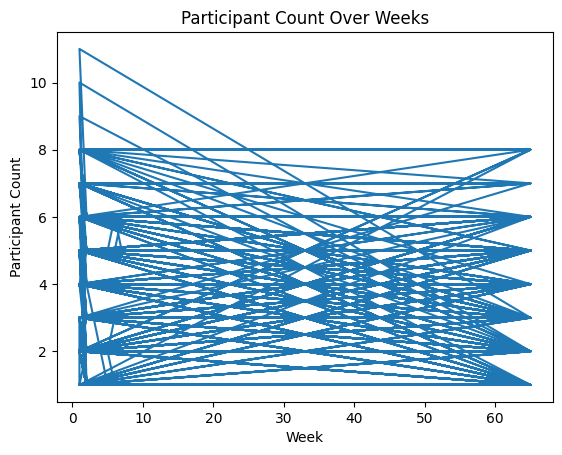

In [20]:
csv_file_path = '../Data/employer_salary_emp_count&p2.csv'
draw_line_chart(csv_file_path)